# Introduction:

It is well known that all the matter in the universe is made of several fundamenta particles and these fundamental particles interact with each other via fundamental forces in nature which are gravitational force, electromagnetic force, strong nuclear force and weak nuclear force. These forces are also carried by some particles. All these material particles and force carrying particles are studied in the branch of physics called the high energy physics or the particle physics. In particular the theory describing these particles and their behaviour is called the satndard model(SM) of particle physics. The Standard Model (SM) of particle physics is the current theory describing fundamental particles as well as strong, weak and electromagnetic interactions. It was formulated in the 1960’s and 1970’s and since then has passed with flying colours extensive experimental tests. Despite these facts, the SM has several severe imperfections. For instance SM does not explain the matter-antimatter asymmetry in the Universe or the structure of generations of elementary particles. Furthermore it does not predict the existence of the dark matter or describes quantum gravity. This leads to extensive studies of extended theories, commonly labelled as physics beyond the Standard Model (BSM).
The matter making fundamental particles are called as fermions(because they obey fermi-dirac statistic) and the force particles are called as bosons(because they obey bose-einstein statistic). Fermions are further divided as leptons and quarks. Both of these kind are observed in three generations. Out of these the lepton generations are electron($e^{-}$) and electron neutrino($\nu_{e}$), muon($\mu^{-}$) and muon neutrino($\nu_{\mu}$), tau($\tau^{-}$) and tau neutrino($\nu_{\tau}$). Each lepton is assigned a lepton flavour ($L_{e}, L_{\mu}, L_{\tau}$) and a lepton number($L$). These are quantum numbers assigned to leptons which, according to SM, are conserved in all the observed reactions/decays in which leptons take part. Even though this is true according to SM, the lepton flavour violation(LFV) is observed in a phenomenon called neutrino oscillation in which one flavour of neutrino transforms into another flavour of neutrino. More such LFVs would be a clear indication of physics beyond standard model.
In view of this, in 1970s, tau($\tau$) lepton was discovered. This tau lepton can decay according to SM as follows
$$\tau^{-} \rightarrow e^{-} \nu_{\tau} \overline{\nu_{e}} $$
$$\tau^{-} \rightarrow \mu^{-} \nu_{\tau} \overline{\nu_{\tau}}$$
where $\tau^{-}$ represents $\tau$ with negative charge, $e^{-}$ represents an electron, $\nu_{\tau}$ represents tau neutrino, $\overline{\nu_{e}}$ represents anti-particle of electron neutrino, $\mu^{-} $ represents negatively charged muon, $\nu_{\tau} $ represents tau neutrino, $\overline{\nu_{\tau}}$ represents anti-particle of tau neutrino. The above decays are validated by SM because they follow conservation of lepton flavours and lepton numbers. However various unexplained phenomenon in universe, such as explanation of matter-antimatter symetry, require the violation of lepton flavour. If lepton flavour violation is allowed they the tau particle can decay according to following reactions too
$$\tau^{-} \rightarrow \mu^{-} \mu^{-} \mu^{+} $$
But since this decay violates lepton flavour conservation it is forbidden according to SM and discovery of such a decay would be a concrete evidence of physics beyond standard model and it would hence be a major breakthrough on the understanding of humans on fundamental laws nature. On this notion, the scientists at LHCb(a high energy collision experiment at Large Hadron Collider in geneva,switzerland) are constantly searching for this particular decay in tau particles produced  by LHC proton-proton collisions.
It is imperative to note here that since the mentioned decay has not yet been discovered experimentally, the reactions which represent occurence of this decay are simulated computationally while the reactions which do not represent this decay are actual experimental reactions. The reactions in which the mentioned decay occurs are represented as "signal events" and are represented by 1 in the signal column of the given datset on the other hand the reactions which do not result in the mentioned decay are referred to as "background events" and are represent by 0 in the "signal" column of the dataset.
The data is divide into 4 files. "training.csv" which is a labelled data set (the signal being 1 for signal events, 0 for background events) to use for training the classifier. "check agreement.csv" is a labelled data set (the signal being 1 for simulated data, 0 for real data) with the same features as in the "training.csv". This data set is used to check the agreement between simulated and real data. "check correlation.csv" is a data set with the same features as the "training.csv", to check the correlation of the classifier with the mass of tau particle. "test.csv" is a non-labelled (signal and background are mixed and indistinguishable for the participants) data set, containing simulated signal events and real background data. Note that the column "signa" is the target variable. Rest of the features are dscussed as we go along with the detailed exploration of the data in the following sections.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
train_df = pd.read_csv("training.csv")
test_df = pd.read_csv("test.csv")
agree_df = pd.read_csv("check_agreement.csv")
corr_df = pd.read_csv("check_correlation.csv")

FileNotFoundError: [Errno 2] File b'training.csv' does not exist: b'training.csv'

In [3]:
train_df.shape

(67553, 51)

In [4]:
# High level statistics of train data
train_df.describe()

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
count,6.755300e+04,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,6.755300e+04,...,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000,67553.000000
mean,9.410285e+06,0.001255,0.999846,15.153986,0.501794,0.090363,5.305426,5.132504,5027.967460,4.496067e-02,...,33050.376570,24407.169131,3.280283,3.197816,3.233437,269.119832,-36.657765,0.616908,1779.389403,0.488508
std,5.420202e+06,0.000779,0.000540,15.060723,0.426345,0.085216,4.331420,3.849261,3010.766079,6.052672e-02,...,30190.555855,25076.484396,0.592017,0.592466,0.588628,127.446169,49.145483,0.486144,66.956336,0.238141
min,9.400000e+01,0.000144,0.990090,0.804510,0.075224,0.000264,0.020823,0.001895,314.100067,9.142349e-08,...,3052.763672,3008.329102,1.638945,1.673761,1.746441,5.000000,-99.000000,0.000000,1480.453491,0.000177
25%,4.703278e+06,0.000725,0.999916,6.225103,0.236352,0.027773,1.830687,1.995162,3157.041748,1.298088e-02,...,14357.550781,9325.879883,2.848309,2.746091,2.792214,171.000000,-99.000000,0.000000,1766.956787,0.277863
50%,9.439761e+06,0.001061,0.999985,10.604475,0.366318,0.058136,3.628297,4.116704,4366.348145,2.912052e-02,...,23996.681641,16510.722656,3.249017,3.166046,3.205477,254.000000,1.000000,1.000000,1777.976562,0.455296
75%,1.411261e+07,0.001559,0.999997,18.554255,0.598817,0.134010,8.221298,7.598480,6079.195801,5.754587e-02,...,40976.976562,30108.750000,3.688323,3.623785,3.647688,354.000000,1.000000,1.000000,1789.937622,0.695368
max,1.877274e+07,0.022134,1.000000,449.242554,5.878616,2.245918,24.074131,14.998641,74390.289062,8.312201e+00,...,602064.750000,461608.593750,5.164036,5.090231,5.124544,632.000000,10.000000,1.000000,1949.984009,0.985871


### check for missing values

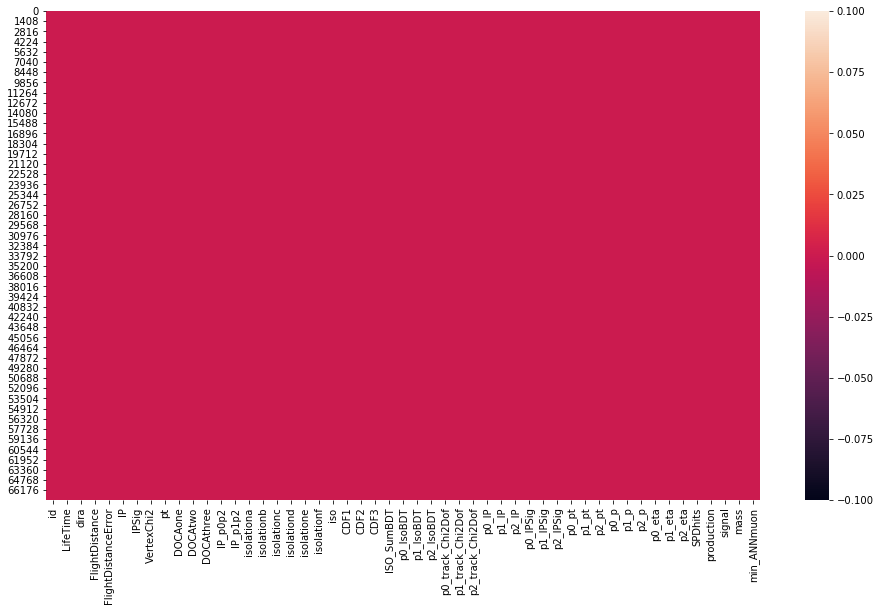

In [5]:
# Checking for missing data
plt.figure(figsize=(16,9))
sns.heatmap(train_df.isna())
plt.show()

### apparently there are no missing values

In [6]:
set(train_df.columns) - set(test_df.columns)

{'mass', 'min_ANNmuon', 'production', 'signal'}

### The test dataset has all the columns that train dataset has, except mass, production, min_ANNmuon, and signal. signal is the target variable. Therefore dropping mass, production, min_ANNmuon columns from train data. 

In [7]:
train_df.drop(["mass", "production", "min_ANNmuon"], inplace=True, axis = 1)

## As it can be seen there are still 47 independant features in the train dataset. Performing basic analysis for all these features is a tedious taks and many of these feautes will not be useful in final classification task. So let us filter out some of the unimportant feaures and let us identify important features to perform basic analysis on.

### Let us first Identify important features based on correlation of features with target variable

#### First let us just examin correlation of each column with every other column using a correlation matrix

In [8]:
# corr_mat is the correlaion matrix of each column in the train data with other column
corr_mat = train_df.corr()

In [9]:
corr_mat.shape

(48, 48)

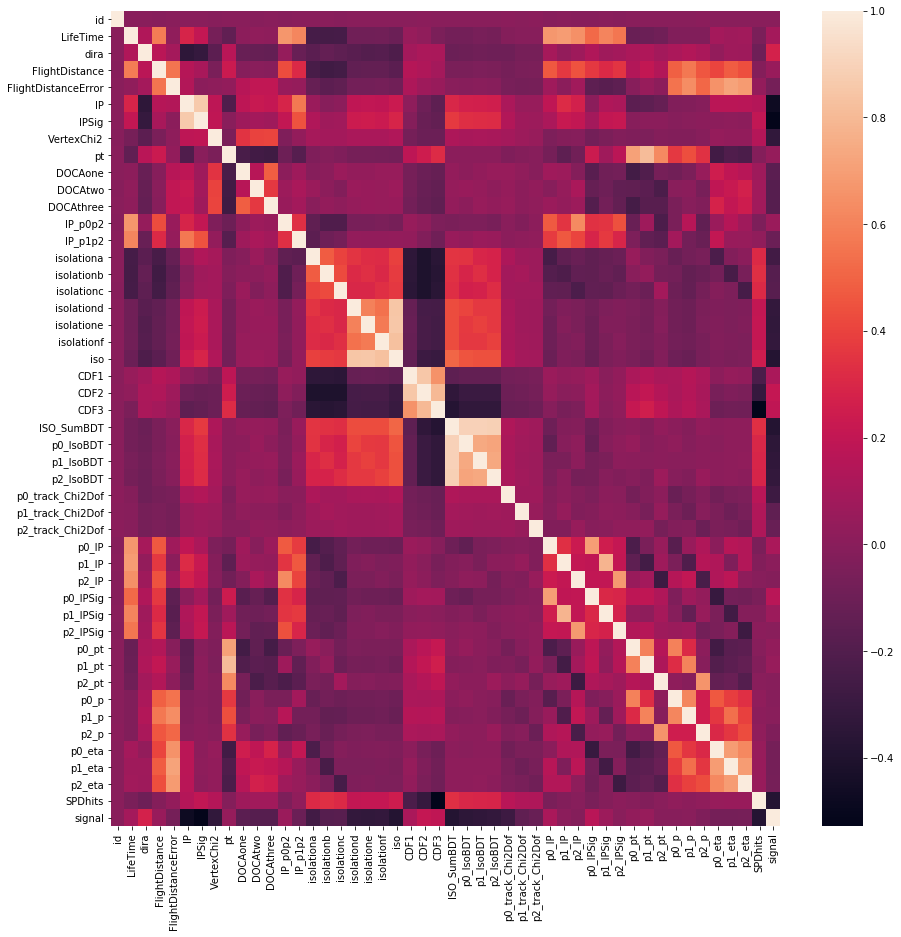

In [10]:
plt.figure(figsize = (15,15))
sns.heatmap(corr_mat)

At first glance it can be seen that: 
- "IP" and "IPSig" are highly negatively correlated with "dira" 
- "IpSig" and "IP" are highly positively correlated
- "pt" is highly negatively correlated woth "DOCAone", "DOCAtwo", "DOCAthree" also "pt" is highly negatively correlated with       "p0_eta", "p1_eta", "p2_eta"
- "isolationa", "isolationb", "isolationc" are highly negatively correlated with "LifeTime" and "FlightDistance" further "isolationb", "isolationc" are highly negatively correlated with "IP_p0p2"
- "CDF1", "CDF2", "CDF3" are separately negatively correlated with "isolationa", "isolationb", "isolationc"
- "CDF2" and "CDF3" are separately highly negatively correlated with "p2_IsoBDT", "p1_IsoBDT", "p0_IsoBDT", "ISO_SumBDT"
- "ISO_SumBDT" is highly positively correlated with "p2_IsoBDT", "p1_IsoBDT" and "p0_IsoBDT"
- "p1_pt" is highly positively correlated with "pt"
- "SPDhits" is highly negatively correlated with "CDF1", "CDF2", "CDF3" 

#### Now let us separtely examine correlation of each feature with the target variable "signal"

In [11]:
# Getting correlation of target variable "signal" with every other feature
corr_mat["signal"].sort_values(ascending = False)

signal                 1.000000
dira                   0.274832
CDF2                   0.207078
CDF3                   0.191552
p0_IPSig               0.166194
p0_IP                  0.115931
CDF1                   0.114125
LifeTime               0.097118
p1_IPSig               0.067253
IP_p0p2                0.059922
FlightDistance         0.056076
p1_pt                  0.049703
pt                     0.043643
p0_pt                  0.028117
p1_IP                  0.006704
p1_p                   0.002273
id                     0.000643
p2_IPSig              -0.002254
p0_p                  -0.003815
p2_pt                 -0.004552
p2_IP                 -0.019502
p2_p                  -0.035502
p2_eta                -0.065038
p0_eta                -0.069145
FlightDistanceError   -0.071107
p1_eta                -0.074185
IP_p1p2               -0.106945
p2_track_Chi2Dof      -0.119317
p1_track_Chi2Dof      -0.146841
DOCAone               -0.168650
isolationc            -0.179380
isolatio

From just pearson correlation coefficients of all the features with *target variable* **"signal"**, it can be seen that **"dira", "CDF2", "CDF3", "p0_IPSig", "p0_IP", "cdf1"** are the most *positively correlated* to the *target variable* and **"IPSIg", "IP", "iso", "ISO_SumBDT", "SPDhits", "p0_IsoBDT", "p1_IsoBDT", "isolatione", "VertexChi2", "p2_IsoBDT", "isolationd", "isolationf", "p0_track_Chi2Dof", "isolationa", "DOCAtwo", "DOCAthree", "isolationb", "isolationc", "DOCAone", "p1_track_Chi2Dof", "p2_track_Chi2Dof", "IP_p1p2"** are the features most *negatively correlated* to the *target varibale*.

In [12]:
train_df.shape

(67553, 48)

### Now let us train a quick random forest classifier with hyperparameter tuning and get feature importance to further select the important features for classification for further analysis also check the accuracy of the model on training data itself for now.

In [34]:
x = train_df.drop(["signal"], axis  = 1)
y = train_df["signal"]

In [35]:
# hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,500]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [5,10,20,40,80]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [36]:
# best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [37]:
# training model with best hyperparameters
model =  RandomForestClassifier(n_estimators = 200,min_samples_split = 5, min_samples_leaf = 2,max_features = 'auto', max_depth = 80, bootstrap = True)
model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
predictions = model.predict(x)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, predictions))

0.9900078456915311


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predictions))

[[25299   580]
 [   95 41579]]


In [42]:
# getting feature importance
importance = model.feature_importances_

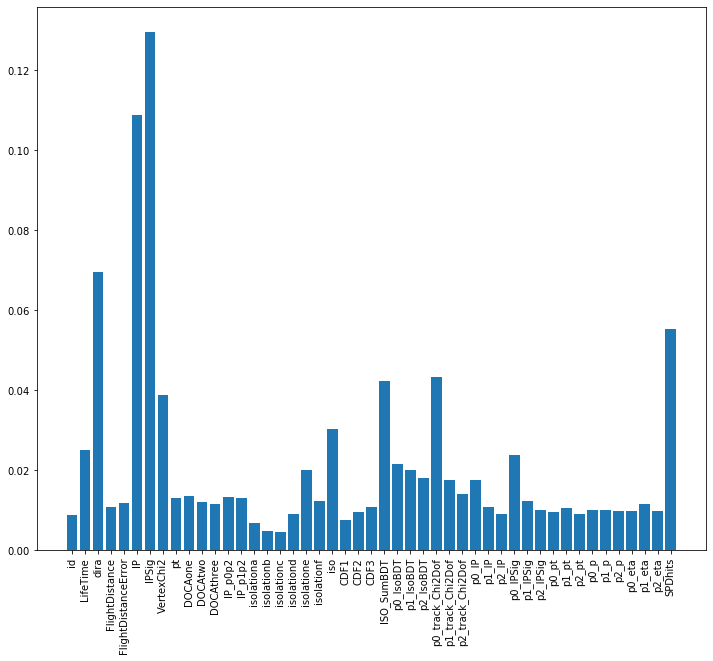

In [62]:
# Plotting feature importance
columns = x.columns
x_pos = np.arange(len(columns))
plt.figure(figsize = (12,10))
plt.bar(x_pos, importance)
plt.xticks(x_pos, columns, rotation='vertical')
plt.show()
#plt.plot(np.array(range(0,47)), importance, 'bo' )

It can be seen that features **"LifeTime", "dira", "IP", "IPSig", "VertexChi2", "iso", "ISO_SumBDT", "p0_track_Chi2Dof", "p0_IpSig", "SPDhits"** seem to be important features

# Feature-wise analysis of important features

## LifeTime
"LifeTime" is the Life time of $\tau$ candidate(in seconds) in decay reaction of $\tau$

In [78]:
train_df["LifeTime"].nunique()

67441

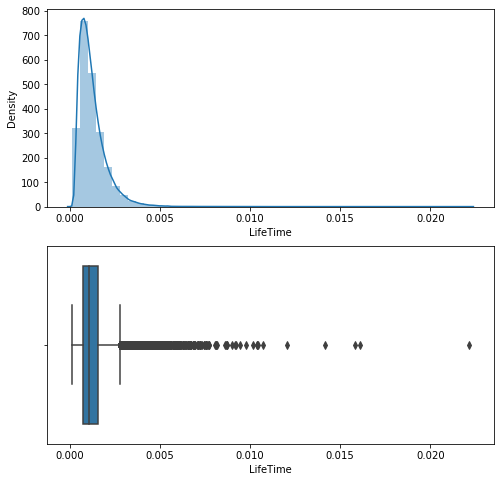

mean = 0.0012545841256456894
median = 0.0010612240293994546
min = 0.0001437305036233738
max = 0.022134378552436832


In [213]:
fig = plt.figure(figsize = (8,8))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["LifeTime"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["LifeTime"])
plt.show()
print("mean = {}".format(train_df["LifeTime"].mean()))
print("median = {}".format(train_df["LifeTime"].median()))
print("min = {}".format(train_df["LifeTime"].min()))
print("max = {}".format(train_df["LifeTime"].max()))

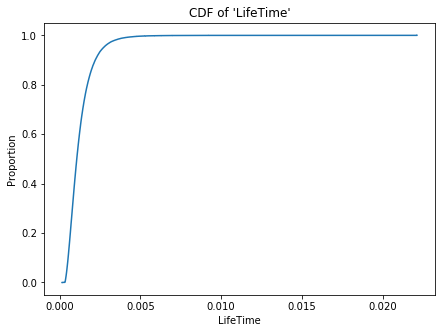

In [218]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="LifeTime")
plt.title("CDF of 'LifeTime'")
plt.show()

class 0 LifeTime mean = 0.0011585665052033399
class 1 LifeTime mean = 0.001314209791514758
class 0 LifeTime median = 0.0009351680055260658
class 1 LifeTime mean = 0.0011347084073349833


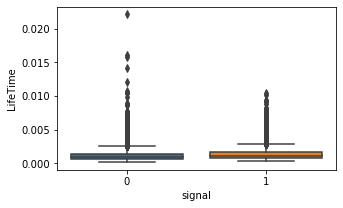

In [199]:
plt.figure(figsize = (5,3))
sns.boxplot(data = train_df, x = "signal", y = "LifeTime")
print("class 0 LifeTime mean = {}".format(train_df.groupby("signal").mean()["LifeTime"][0]))
print("class 1 LifeTime mean = {}".format(train_df.groupby("signal").mean()["LifeTime"][1]))
print("class 0 LifeTime median = {}".format(train_df.groupby("signal").median()["LifeTime"][0]))
print("class 1 LifeTime mean = {}".format(train_df.groupby("signal").median()["LifeTime"][1]))

First of all "LifeTime" can be treated as a continuous variable."LifeTime" shows left skewed distribution with majority of data lying below 0.005. Furthermore there are a lots of outliers with more that 90% of the data lying below 0.005. Looking at the box plot and the means and medians of LifeTime for two different signals, it can be said that LifeTime does not possess clear discriminative power to distinguish between two signals. Still in general larger outlier LifeTime values correspond to signal 0 but IQR for signal 1 is greater than IQR for signal 0 for the variable LifeTime. These facts migh be helpful in classification. 

# dira
"dira" is the Cosine of the angle between the $\tau$ momentum and line between PV and $\tau$ vertex. 

In [79]:
train_df["dira"].nunique()

10647

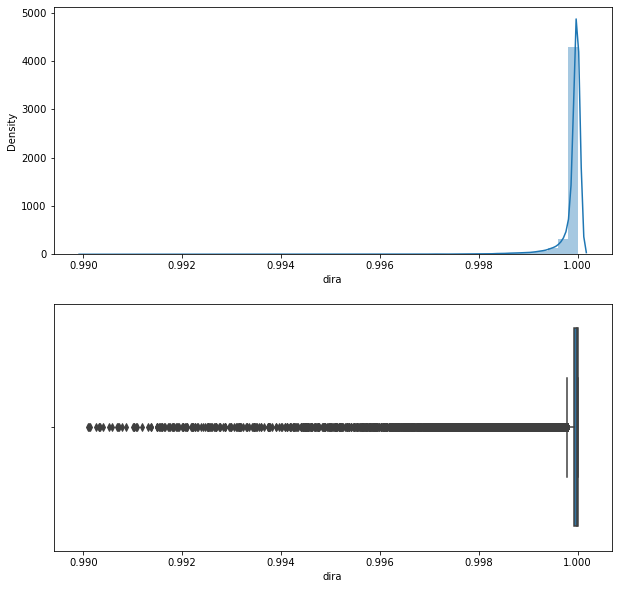

mean = 0.9998460369673181
median = 0.9999854564666748
min = 0.9900895357131958
max = 1.0


In [69]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["dira"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["dira"])
plt.show()
print("mean = {}".format(train_df["dira"].mean()))
print("median = {}".format(train_df["dira"].median()))
print("min = {}".format(train_df["dira"].min()))
print("max = {}".format(train_df["dira"].max()))

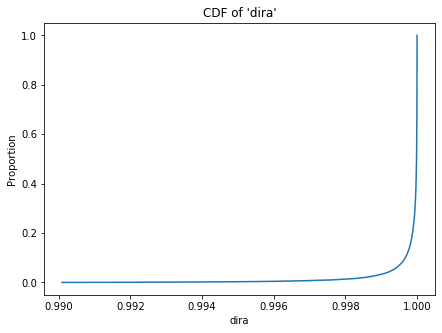

In [219]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="dira")
plt.title("CDF of 'dira'")
plt.show()

class 0 dira mean = 0.9996577343389256
class 1 dira mean = 0.9999629703963187
class 0 dira median = 0.9999164938926696
class 1 dira mean = 0.9999945759773254


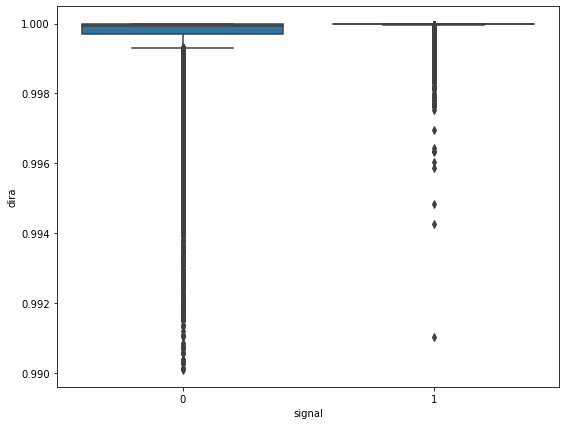

In [64]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "dira")
print("class 0 dira mean = {}".format(train_df.groupby("signal").mean()["dira"][0]))
print("class 1 dira mean = {}".format(train_df.groupby("signal").mean()["dira"][1]))
print("class 0 dira median = {}".format(train_df.groupby("signal").median()["dira"][0]))
print("class 1 dira mean = {}".format(train_df.groupby("signal").median()["dira"][1]))

"dira" variable can also be treated as a continuous variable. First thing to note is that the range of this variable is too small, it lies between 0.990 to 1.0. Looking at the PDF, it is extremely left skewed which says that most of the data lies near 1.0. Looking at the CDF it can be quantitatively seen that apprximately more than 90% of the data lies above 0.999. Also there are a lot of outliers for signal 1 and 2 both but the box plot of "dira" for two signals separately shows that the boxplots do not overlap completely so this feature would be helpful in discriminating class 0 from class 1.

# IP
"IP" is the Impact Parameter of $\tau$ candidate.


In [13]:
train_df["IP"].nunique()

67492

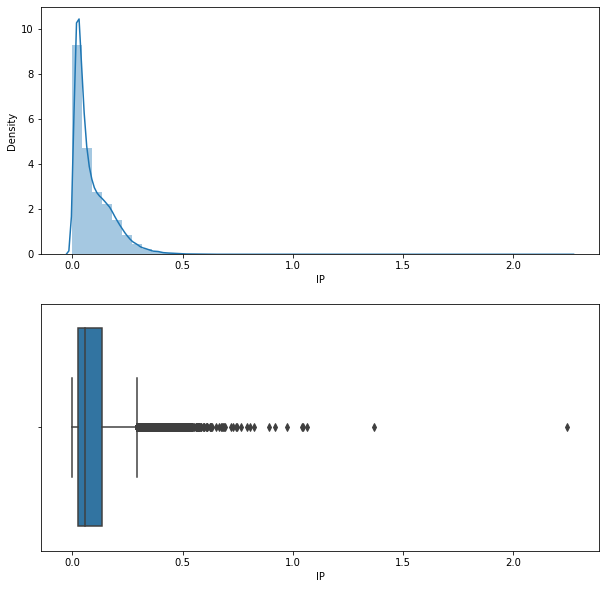

mean = 0.09036295589094158
median = 0.05813586339354515
min = 0.00026414846070110803
max = 2.245917797088623


In [14]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["IP"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["IP"])
plt.show()
print("mean = {}".format(train_df["IP"].mean()))
print("median = {}".format(train_df["IP"].median()))
print("min = {}".format(train_df["IP"].min()))
print("max = {}".format(train_df["IP"].max()))

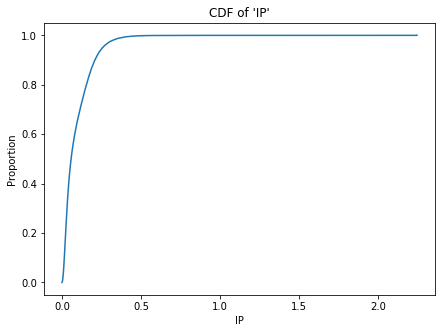

In [16]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="IP")
plt.title("CDF of 'IP'")
plt.show()

class 0 IP mean = 0.14121820540713997
class 1 IP mean = 0.05878252199379471
class 0 IP median = 0.12876106798648834
class 1 IP mean = 0.036024292930960655


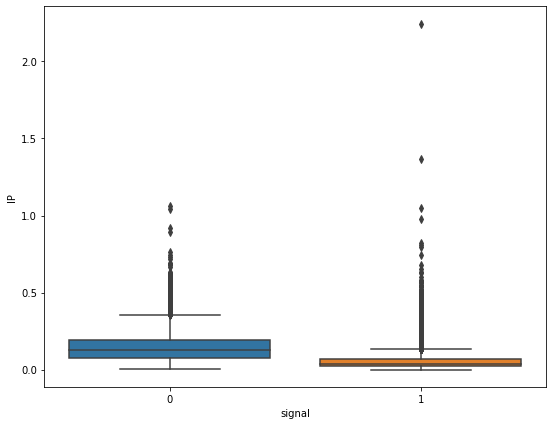

In [15]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "IP")
print("class 0 IP mean = {}".format(train_df.groupby("signal").mean()["IP"][0]))
print("class 1 IP mean = {}".format(train_df.groupby("signal").mean()["IP"][1]))
print("class 0 IP median = {}".format(train_df.groupby("signal").median()["IP"][0]))
print("class 1 IP mean = {}".format(train_df.groupby("signal").median()["IP"][1]))

"IP" variable can also be treated as a continuous variable. First thing to note is that the range of this variable lies between 0.00026 to 2.246. Looking at the PDF, it is right skewed which says that most of the data lies below 0.5. Looking at the CDF it can be quantitatively seen that apprximately more than 90% of the data lies below 0.5. Also there are a lot of outliers for signal 1 and 2 both but the box plot of "IP" for two signals separately shows that the boxplots do not overlap. Infact the boxplots for two signals(at least the IQR of the "IP" of two signals) do not overlap at all. So this feature would be very helpful in discriminating class 0 from class 1.

# IPSig
IPSig is the Significance of Impact Parameter of $\tau$ candidate


In [81]:
train_df["IPSig"].nunique()

67492

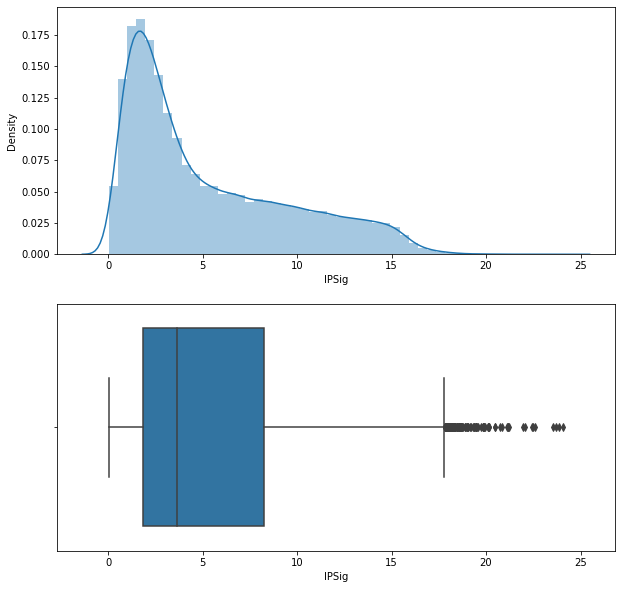

mean = 5.305425766736997
median = 3.628296852111816
min = 0.020823288708925247
max = 24.07413101196289


In [74]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["IPSig"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["IPSig"])
plt.show()
print("mean = {}".format(train_df["IPSig"].mean()))
print("median = {}".format(train_df["IPSig"].median()))
print("min = {}".format(train_df["IPSig"].min()))
print("max = {}".format(train_df["IPSig"].max()))

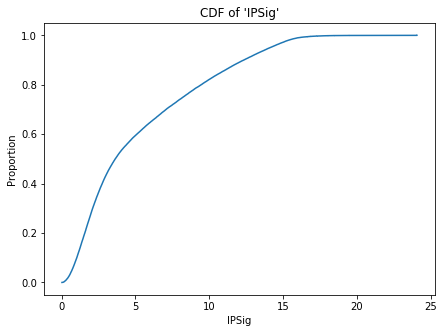

In [17]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="IPSig")
plt.title("CDF of 'IPSig'")
plt.show()

class 0 IPSig mean = 8.15982516417997
class 1 IPSig mean = 3.532881686340905
class 0 IPSig median = 7.906876087188722
class 1 IPSig mean = 2.3301271200180054


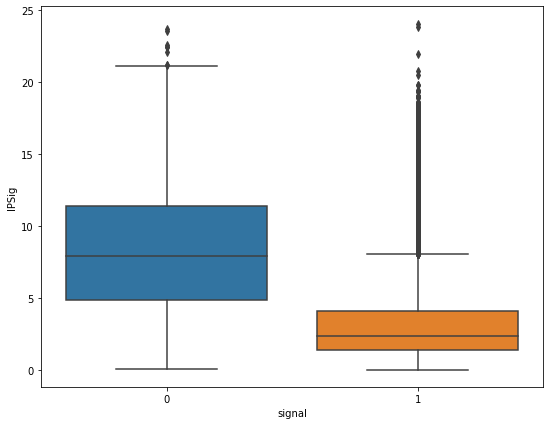

In [75]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "IPSig")
print("class 0 IPSig mean = {}".format(train_df.groupby("signal").mean()["IPSig"][0]))
print("class 1 IPSig mean = {}".format(train_df.groupby("signal").mean()["IPSig"][1]))
print("class 0 IPSig median = {}".format(train_df.groupby("signal").median()["IPSig"][0]))
print("class 1 IPSig mean = {}".format(train_df.groupby("signal").median()["IPSig"][1]))

"IPSig" variable can also be treated as a continuous variable. Looking at the PDF, it is right skewed. Looking at the CDF it can be quantitatively seen that more than 90% of the data lies below data value of 15. 50% of the data lies between 2 and 8 which is approximately the IQR Also there are some outliers for both the signals but for signal 1 there are more outliers. The box plot of "IPSig" for two signals separately shows that the boxplots do not overlap at all at least for the IQRs of the two signals. So this feature thus far is the best feature to differentiate between the two signals.

# VertexChi2
VertecChi2 is the the $\chi^2$ of $\tau$ vertex

In [82]:
train_df["VertexChi2"].nunique()

67498

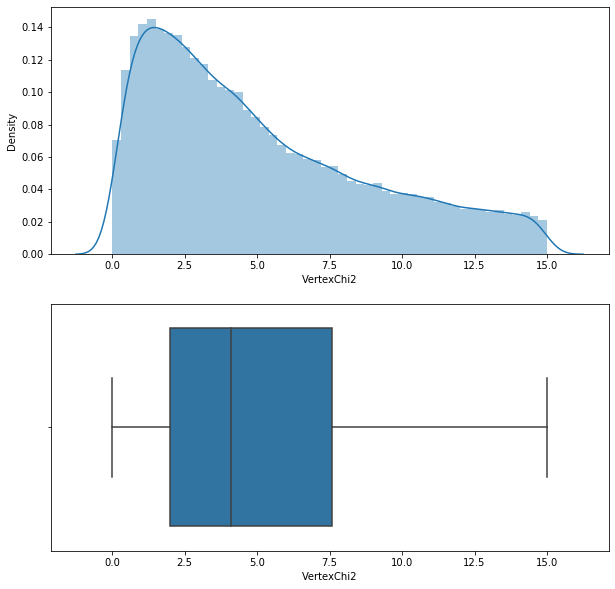

mean = 5.132503786219916
median = 4.11670446395874
min = 0.0018949001096189024
max = 14.99864101409912


In [76]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["VertexChi2"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["VertexChi2"])
plt.show()
print("mean = {}".format(train_df["VertexChi2"].mean()))
print("median = {}".format(train_df["VertexChi2"].median()))
print("min = {}".format(train_df["VertexChi2"].min()))
print("max = {}".format(train_df["VertexChi2"].max()))

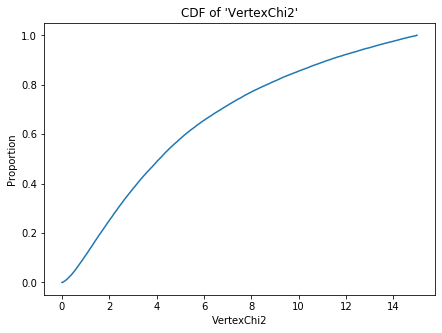

In [18]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="VertexChi2")
plt.title("CDF of 'VertexChi2'")
plt.show()

class 0 VertexChi2 mean = 6.735799884807313
class 1 VertexChi2 mean = 4.1368782226708625
class 0 VertexChi2 median = 6.2709007263183585
class 1 VertexChi2 mean = 3.24860680103302


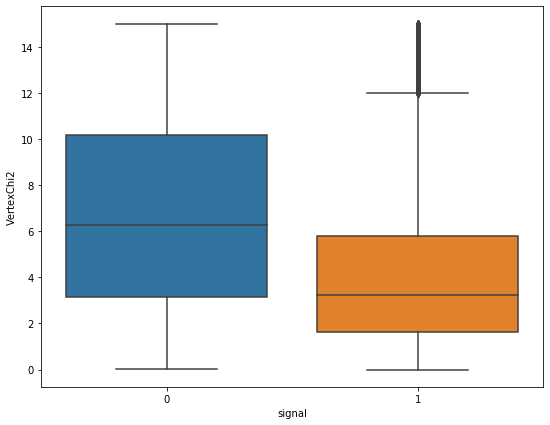

In [77]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "VertexChi2")
print("class 0 VertexChi2 mean = {}".format(train_df.groupby("signal").mean()["VertexChi2"][0]))
print("class 1 VertexChi2 mean = {}".format(train_df.groupby("signal").mean()["VertexChi2"][1]))
print("class 0 VertexChi2 median = {}".format(train_df.groupby("signal").median()["VertexChi2"][0]))
print("class 1 VertexChi2 mean = {}".format(train_df.groupby("signal").median()["VertexChi2"][1]))

"VertexChi2" variable can also be treated as a continuous variable. Looking at the PDF, it is slightly right skewed. Looking at the CDF it can be quantitatively seen that more than 50% of the data lies below data value of 6 and 50% lies above 6 while the range of the data values is between 0 to 14. So even though the distribution is slightly right skewed there is considerably enough population of all the data values so distribution is slightly inclined towards being uniform distribution. Also there are no outliers for this variable. In fact almost all the data lies in the IQR. The box plot of "IPSig" for two signals separately shows that the boxplots overlap to some extent but ingeneral value of this feature for signal 1 is lower than that for signal 0. So this fact can be useful dor discriminating between two signals.

# iso
iso is the Track isolation variable

In [83]:
train_df["iso"].nunique()

21

In [85]:
train_df["iso"].unique()

array([ 4.,  2.,  0.,  9.,  3.,  1.,  6.,  7.,  5.,  8., 10., 15., 13.,
       11., 14., 12., 20., 18., 16., 17., 21.])

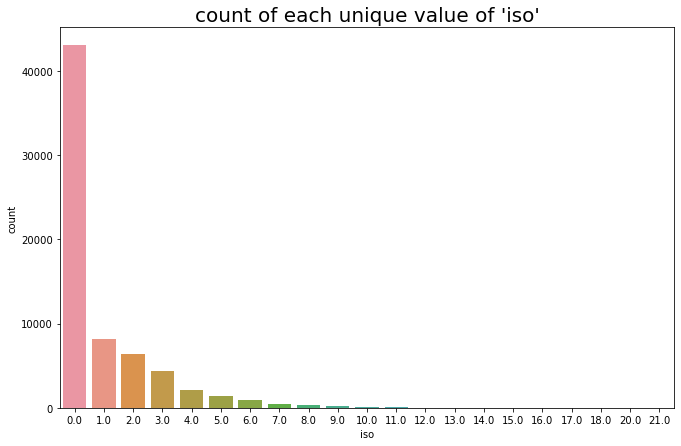

In [108]:
plt.figure(figsize = (11,7))
sns.countplot(train_df["iso"])
plt.title("count of each unique value of 'iso'", fontdict = {"fontsize" : 20})
plt.show()

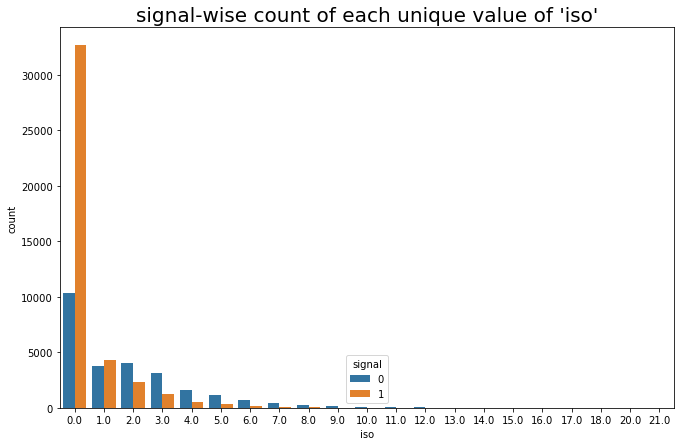

In [109]:
plt.figure(figsize = (11,7))
sns.countplot(train_df["iso"], hue = train_df["signal"])
plt.title("signal-wise count of each unique value of 'iso'", fontdict = {"fontsize" : 20})
plt.show()

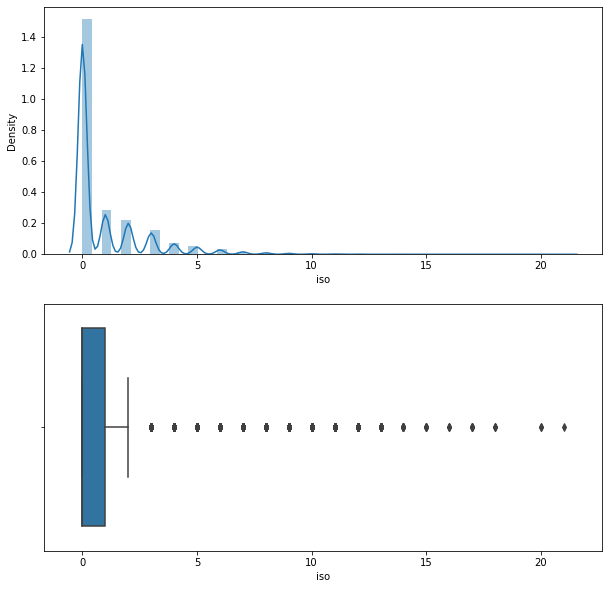

mean = 0.9690761328142348
median = 0.0
min = 0.0
max = 21.0


In [86]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["iso"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["iso"])
plt.show()
print("mean = {}".format(train_df["iso"].mean()))
print("median = {}".format(train_df["iso"].median()))
print("min = {}".format(train_df["iso"].min()))
print("max = {}".format(train_df["iso"].max()))

class 0 VertexChi2 mean = 1.8121256617334518
class 1 VertexChi2 mean = 0.44555358256946775
class 0 VertexChi2 median = 1.0
class 1 VertexChi2 mean = 0.0


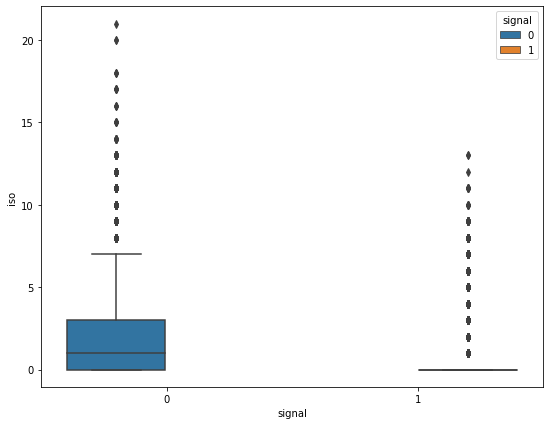

In [112]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "iso", hue = "signal")
print("class 0 VertexChi2 mean = {}".format(train_df.groupby("signal").mean()["iso"][0]))
print("class 1 VertexChi2 mean = {}".format(train_df.groupby("signal").mean()["iso"][1]))
print("class 0 VertexChi2 median = {}".format(train_df.groupby("signal").median()["iso"][0]))
print("class 1 VertexChi2 mean = {}".format(train_df.groupby("signal").median()["iso"][1]))

The feature "iso" is a discrete feature with 21 distinct values ranging from 0 to 21 except 19. Out of all these values the count of data value 0 is the most. almost 42000 data values out of 67000 i.e. nearly 62 % of the data values is 0. From this the count of other successive data values goes on decreasing as the value increases. Interesting thing to note here is that for data values 0 and 1 the count of signal 0 "iso" feature is greater for 1. But for "iso" values greater than 1, this behaviour reverses i.e. count of signal "0" "iso" feature is greater that that for signal "1". The box plot for two different signals shows that most values of "iso" are belonging to signal 0 and very less amount of data values of "iso" belong to signal 1.

## conducting chi-square test to obtain dependacy of 'signal' on 'iso'

In [23]:
# contigency table between "signal" and "iso"
sig_iso_cont = pd.crosstab(train_df['signal'],train_df['iso'], margins = False)

In [24]:
sig_iso_cont

iso,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,21.0
signal,,,,,,,,,,,,,,,,,,,,,
0,10355,3792,4035,3127,1628,1156,745,407,245,162,...,52,32,23,9,5,3,5,3,2,1
1,32640,4326,2312,1247,523,302,150,86,50,22,...,7,1,2,0,0,0,0,0,0,0


In [25]:
np.array(sig_iso_cont.values)

array([[10355,  3792,  4035,  3127,  1628,  1156,   745,   407,   245,
          162,    92,    52,    32,    23,     9,     5,     3,     5,
            3,     2,     1],
       [32640,  4326,  2312,  1247,   523,   302,   150,    86,    50,
           22,     6,     7,     1,     2,     0,     0,     0,     0,
            0,     0,     0]], dtype=int64)

In [26]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
print("null hypothesis : no relation exists between 'signal' and 'iso' i.e. they are independant")
print("alternate hypothesis : there is a relationship between 'signal' and 'iso' i.e. they are dependant")
print("\n")
stat, p, dof, expected = chi2_contingency(sig_iso_cont)
print('dof = {}'.format(dof))
print("expected contigency table:")
print(expected)
print("-"*100)
print("observed contingency table:")
print(sig_iso_cont.values)
print("-"*100)
print("\n")
# interpret test-statistic
print("Interpreting test statistic: \n")
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability = {}, critical = {}, stat = {}'.format(prob, critical, stat))
if abs(stat) >= critical:
    print('reject null hypothesis. variables are dependent')
else:
    print('accept null hypothesis. the variables are independent')
    
print("-"*100)
print("\n")
# interpret p-value
print("Interpreting p-value: \n")
alpha = 1.0 - prob
print('significance = {}, p = {}'.format(alpha, p))
if p <= alpha:
    print('reject null hypothesis. the variables are dependent')
else:
    print('accept null hypothesis. the variables are independent')

null hypothesis : no relation exists between 'signal' and 'iso' i.e. they are independant
alternate hypothesis : there is a relationship between 'signal' and 'iso' i.e. they are dependant


dof = 20
expected contigency table:
[[1.64710317e+04 3.10993919e+03 2.43148362e+03 1.67564351e+03
  8.24030450e+02 5.58547837e+02 3.42867156e+02 1.88864255e+02
  1.13012079e+02 7.04888902e+01 3.75429959e+01 2.26024159e+01
  1.26420292e+01 9.57729486e+00 3.44782615e+00 1.91545897e+00
  1.14927538e+00 1.91545897e+00 1.14927538e+00 7.66183589e-01
  3.83091795e-01]
 [2.65239683e+04 5.00806081e+03 3.91551638e+03 2.69835649e+03
  1.32696955e+03 8.99452163e+02 5.52132844e+02 3.04135745e+02
  1.81987921e+02 1.13511110e+02 6.04570041e+01 3.63975841e+01
  2.03579708e+01 1.54227051e+01 5.55217385e+00 3.08454103e+00
  1.85072462e+00 3.08454103e+00 1.85072462e+00 1.23381641e+00
  6.16908205e-01]]
----------------------------------------------------------------------------------------------------
observed conting

## 'signal' depends on 'iso' with high degree

# ISO_SumBDT
ISO_SumBDT is a Track isolation variable

In [125]:
train_df["ISO_SumBDT"].nunique()

45665

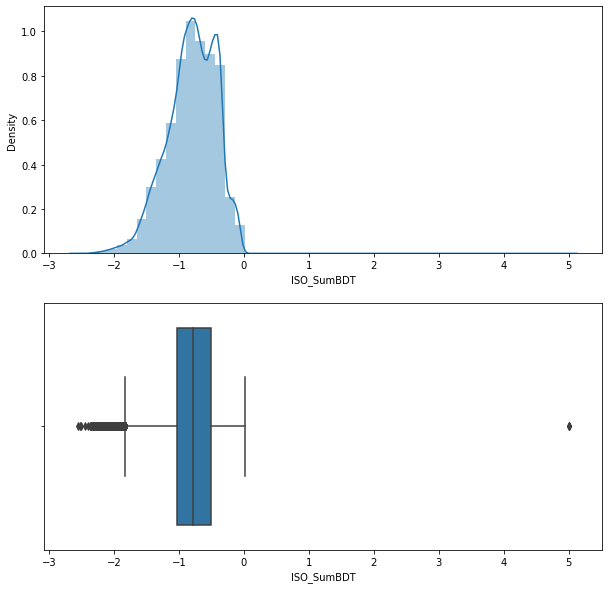

mean = -0.8046266676991672
median = -0.7753793597221375
min = -2.5594003200531006
max = 5.0


In [126]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["ISO_SumBDT"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["ISO_SumBDT"])
plt.show()
print("mean = {}".format(train_df["ISO_SumBDT"].mean()))
print("median = {}".format(train_df["ISO_SumBDT"].median()))
print("min = {}".format(train_df["ISO_SumBDT"].min()))
print("max = {}".format(train_df["ISO_SumBDT"].max()))

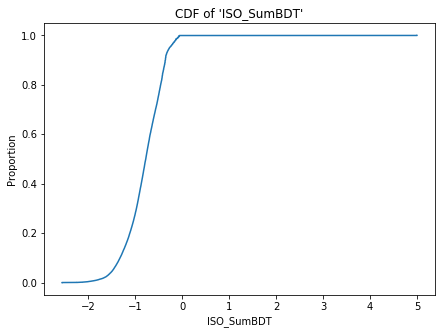

In [27]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="ISO_SumBDT")
plt.title("CDF of 'ISO_SumBDT'")
plt.show()

class 0 ISO_SumBDT mean = -0.6219147565860126
class 1 ISO_SumBDT mean = -0.9180883355903544
class 0 ISO_SumBDT median = -0.5608963966369629
class 1 ISO_SumBDT mean = -0.8921532630920409


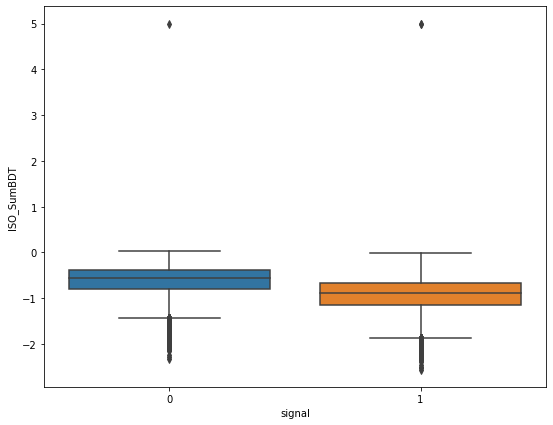

In [127]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "ISO_SumBDT")
print("class 0 ISO_SumBDT mean = {}".format(train_df.groupby("signal").mean()["ISO_SumBDT"][0]))
print("class 1 ISO_SumBDT mean = {}".format(train_df.groupby("signal").mean()["ISO_SumBDT"][1]))
print("class 0 ISO_SumBDT median = {}".format(train_df.groupby("signal").median()["ISO_SumBDT"][0]))
print("class 1 ISO_SumBDT mean = {}".format(train_df.groupby("signal").median()["ISO_SumBDT"][1]))

"ISO_SumBDT" variable can also be treated as a continuous variable. Looking at the PDF, there is no distinct defined distribution as such. Looking at the CDF it can be quantitatively seen that almost all values are below 0. One data value in particular which is 5, is clearly an outlier because it lies too far away from rest of the data. Except that the values below -2 are also little away from where most of the data lies. The box plot of this feature for two signals separately shows that the boxplots overlap to some extent but in general value of this feature for signal 1 is lower than that for signal 0. So this fact can be useful dor discriminating between two signals.

# p0_track_Chi2Dof
p0_track_Chi2Dof is the Quality of p0 muon track

In [28]:
train_df["p0_track_Chi2Dof"].nunique()

67355

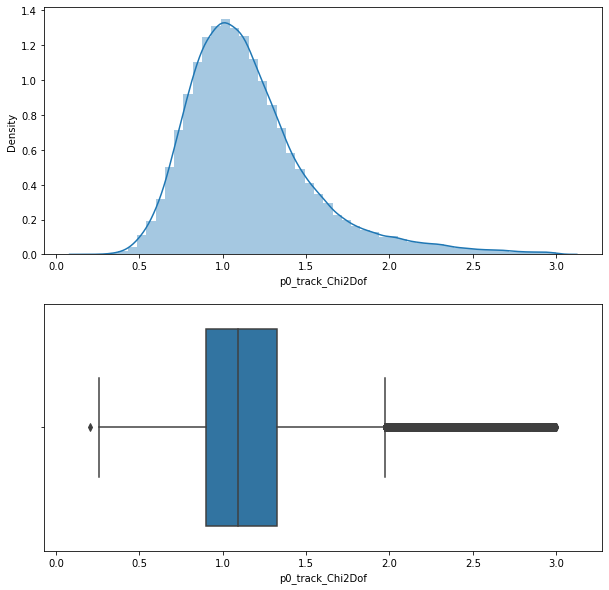

mean = 1.1597630295020096
median = 1.0920145511627195
min = 0.2062930315732956
max = 2.998945951461792


In [129]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["p0_track_Chi2Dof"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["p0_track_Chi2Dof"])
plt.show()
print("mean = {}".format(train_df["p0_track_Chi2Dof"].mean()))
print("median = {}".format(train_df["p0_track_Chi2Dof"].median()))
print("min = {}".format(train_df["p0_track_Chi2Dof"].min()))
print("max = {}".format(train_df["p0_track_Chi2Dof"].max()))

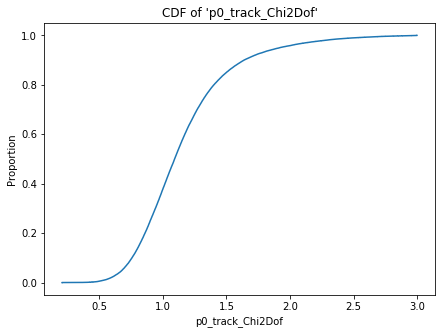

In [29]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="p0_track_Chi2Dof")
plt.title("CDF of 'p0_track_Chi2Dof'")
plt.show()

class 0 p0_track_Chi2Dof mean = 1.2975028767802348
class 1 p0_track_Chi2Dof mean = 1.0742284154089734
class 0 p0_track_Chi2Dof median = 1.2072685956954956
class 1 p0_track_Chi2Dof mean = 1.0423091053962708


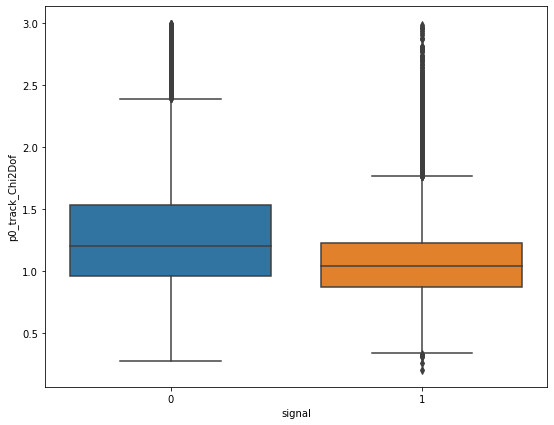

In [130]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "p0_track_Chi2Dof")
print("class 0 p0_track_Chi2Dof mean = {}".format(train_df.groupby("signal").mean()["p0_track_Chi2Dof"][0]))
print("class 1 p0_track_Chi2Dof mean = {}".format(train_df.groupby("signal").mean()["p0_track_Chi2Dof"][1]))
print("class 0 p0_track_Chi2Dof median = {}".format(train_df.groupby("signal").median()["p0_track_Chi2Dof"][0]))
print("class 1 p0_track_Chi2Dof mean = {}".format(train_df.groupby("signal").median()["p0_track_Chi2Dof"][1]))

"p0_track_Chi2Dof" variable can also be treated as a continuous variable. Looking at the PDF, the diftribution is very close to being the normal distribution even though some tailedness can be observed on the far end of the distribution. Looking at the CDF it can be quantitatively seen that almost 90% of the data values lie below 2 with range of the data being from 0.2 to 2.99. There are outliers in the data beyond the value of 2 which means nearly 10% of the data values are outliers. box plot of this feature for two signals separately shows that the boxplots overlap to large extent. Still in general the data values for signal 1 are in general are lesser than those for signal 0. So this feature might not be as useful as other variables discussed above to discriminate between the 0 and 1 signals.

# p0_IpSig
p0_IPSig - Impact Parameter Significance of p0 muon

In [131]:
train_df["p0_IPSig"].nunique()

67467

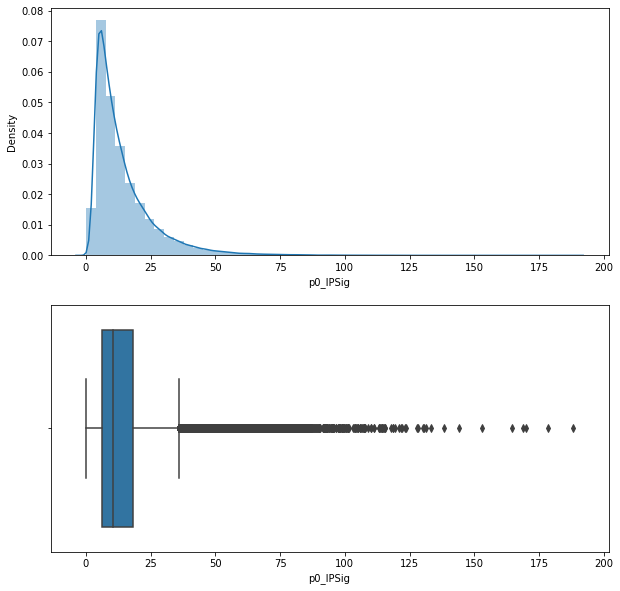

mean = 14.3631759599477
median = 10.434813499450684
min = 0.14147670567035675
max = 188.02430725097656


In [132]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["p0_IPSig"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["p0_IPSig"])
plt.show()
print("mean = {}".format(train_df["p0_IPSig"].mean()))
print("median = {}".format(train_df["p0_IPSig"].median()))
print("min = {}".format(train_df["p0_IPSig"].min()))
print("max = {}".format(train_df["p0_IPSig"].max()))

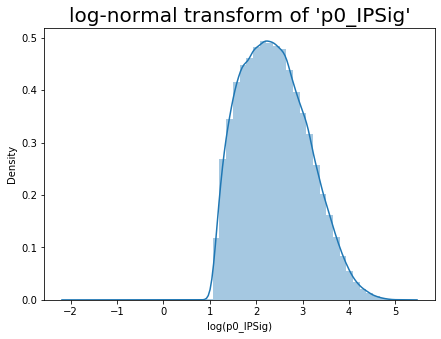

In [90]:
# investigating the box-cox transform with lambda = 0 i.e. checking for log-normal distribution
from scipy.stats import boxcox
plt.figure(figsize = (7,5))
sns.distplot((boxcox(train_df["p0_IPSig"], 0)))
plt.title("log-normal transform of 'p0_IPSig'", fontdict = {"fontsize":20})
plt.xlabel("log(p0_IPSig)")
plt.show()

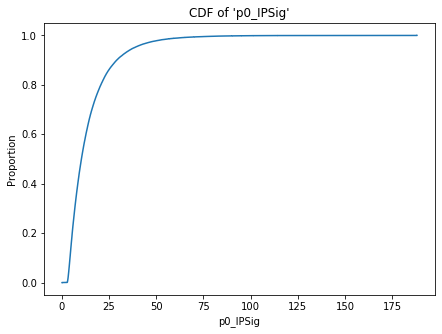

In [91]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="p0_IPSig")
plt.title("CDF of 'p0_IPSig'")
plt.show()

class 0 p0_IPSig mean = 11.765347970831481
class 1 p0_IPSig mean = 15.976392606546026
class 0 p0_IPSig median = 8.331633567810059
class 1 p0_IPSig mean = 12.003243446350098


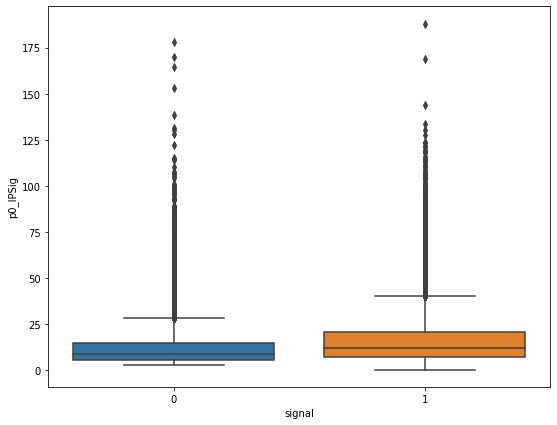

In [133]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "p0_IPSig")
print("class 0 p0_IPSig mean = {}".format(train_df.groupby("signal").mean()["p0_IPSig"][0]))
print("class 1 p0_IPSig mean = {}".format(train_df.groupby("signal").mean()["p0_IPSig"][1]))
print("class 0 p0_IPSig median = {}".format(train_df.groupby("signal").median()["p0_IPSig"][0]))
print("class 1 p0_IPSig mean = {}".format(train_df.groupby("signal").median()["p0_IPSig"][1]))

"p0_IPSig" variable can also be treated as a continuous variable. Looking at the PDF, the diftribution is very close to being the power law distribution so it is possible to convert this distribution into normal distribution using some kind of transformation. Here we use boxcox transform with lambda = 0  i.e. we are conducting log transform to reveal if there is a normal distribution underlying this data. The distribution of transformed data shows that the underlying distribution os nearly normal distribution not exactly normal. Looking at the CDF it can be quantitatively seen that almost 90% of the data values lie below 50 with range of the data being from 0.14 to 188. There are outliers in the data beyond the value of 30 or 35. box plot of this feature for two signals separately shows that the boxplots overlap to large extent. Still in general the data values for signal 0 are in general are lesser than those for signal 1. So this feature might not be as useful as other variables discussed above to discriminate between the 0 and 1 signals.

# SPDhits
SPDhits is the number of hits in the SPD detector

In [92]:
train_df["SPDhits"].nunique()

623

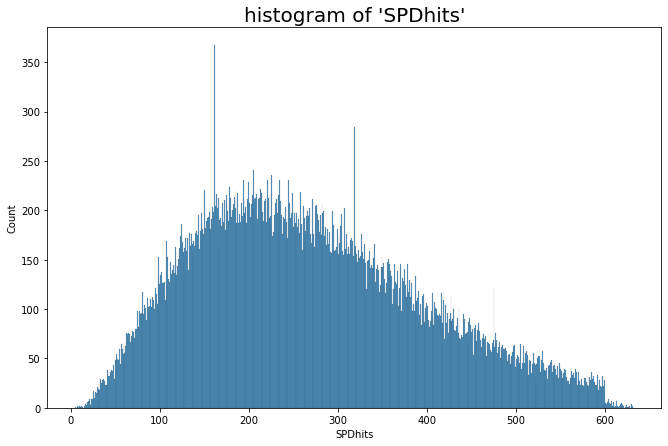

In [93]:
plt.figure(figsize = (11,7))
sns.histplot(train_df["SPDhits"], bins = 623)
plt.title("histogram of 'SPDhits'", fontdict = {"fontsize" : 20})
plt.show()

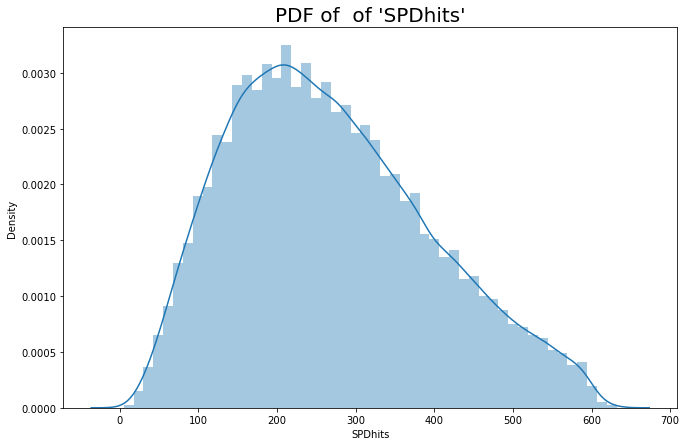

In [94]:
plt.figure(figsize = (11,7))
sns.distplot(train_df["SPDhits"])
plt.title("PDF of  of 'SPDhits'", fontdict = {"fontsize" : 20})
plt.show()

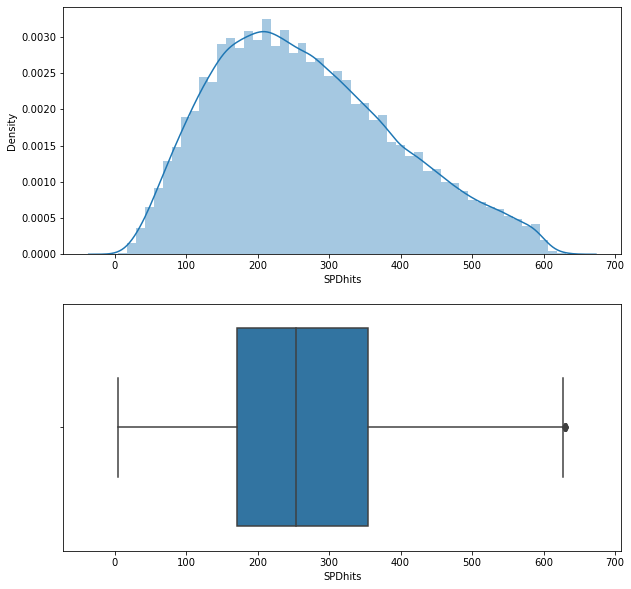

mean = 269.1198318357438
median = 254.0
min = 5
max = 632


In [95]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["SPDhits"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["SPDhits"])
plt.show()
print("mean = {}".format(train_df["SPDhits"].mean()))
print("median = {}".format(train_df["SPDhits"].median()))
print("min = {}".format(train_df["SPDhits"].min()))
print("max = {}".format(train_df["SPDhits"].max()))

class 0 SPDhits mean = 330.2213764055798
class 1 SPDhits mean = 231.1765849210539
class 0 SPDhits median = 324
class 1 SPDhits mean = 216


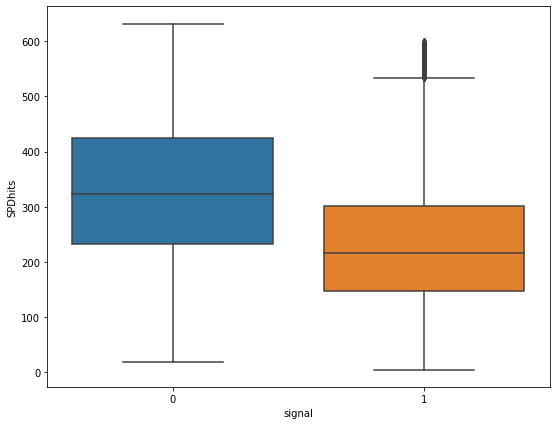

In [96]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "SPDhits")
print("class 0 SPDhits mean = {}".format(train_df.groupby("signal").mean()["SPDhits"][0]))
print("class 1 SPDhits mean = {}".format(train_df.groupby("signal").mean()["SPDhits"][1]))
print("class 0 SPDhits median = {}".format(train_df.groupby("signal").median()["SPDhits"][0]))
print("class 1 SPDhits mean = {}".format(train_df.groupby("signal").median()["SPDhits"][1]))

Looking at the unique values of this feature, it seems that the feature is discrete valued. But looking at the histogram of this feature with number of bins equal to the number of unique values of the feature it can be seen that the variable can be approximated to the continuous variable. So we will assume this variable to be continuous varibale. The PDF of this varibale shows it to be very loosely to be normal distribution with greater standard deviation. The box plot shows IQR to be between 180 and 360 and very less count of outliers. The low outlier count can be seen from approximately equal mean and median when the range of the data is taken into account. The boxplots for two separate signals show that the IQRs for both the signals overlap to a greate extend but still the IQR for signal 1 is a little on the lower side compared to the IQR for the signal 0. So this feature might not be too useful to discriminate between two signals but still it may prove its importance.

# CDF2
CDF2 - Cone isolation variable

In [97]:
train_df["CDF2"].nunique()

62029

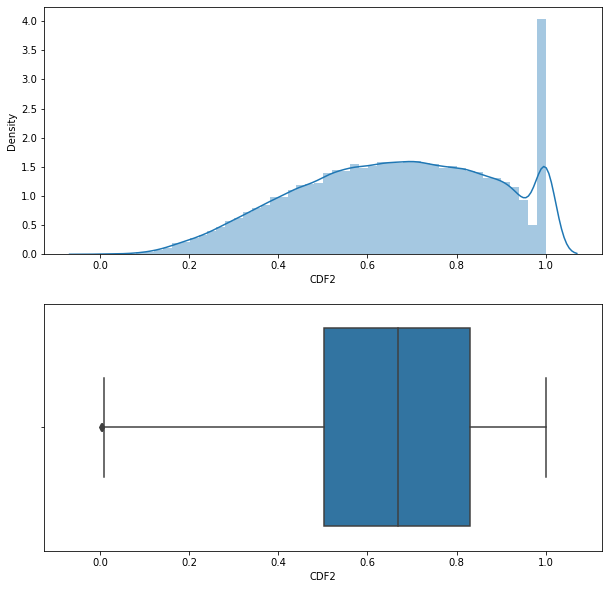

mean = 0.6599494686233768
median = 0.6689612865447998
min = 0.0015978723531588912
max = 1.0


In [98]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["CDF2"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["CDF2"])
plt.show()
print("mean = {}".format(train_df["CDF2"].mean()))
print("median = {}".format(train_df["CDF2"].median()))
print("min = {}".format(train_df["CDF2"].min()))
print("max = {}".format(train_df["CDF2"].max()))

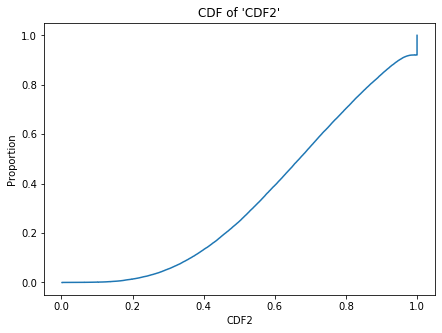

In [100]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="CDF2")
plt.title("CDF of 'CDF2'")
plt.show()

class 0 CDF2 mean = 0.6035774457308318
class 1 CDF2 mean = 0.6949557454491236
class 0 CDF2 median = 0.5991633534431458
class 1 CDF2 mean = 0.7078306972980499


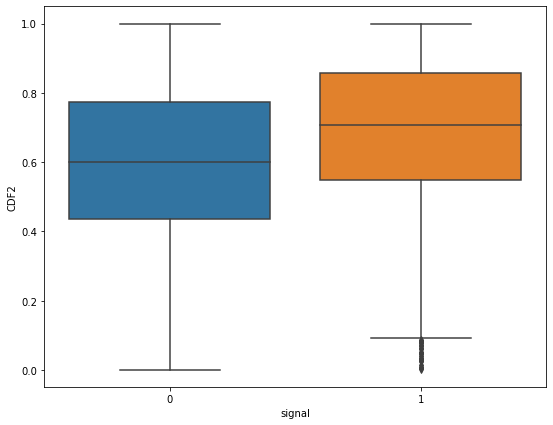

In [99]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "CDF2")
print("class 0 CDF2 mean = {}".format(train_df.groupby("signal").mean()["CDF2"][0]))
print("class 1 CDF2 mean = {}".format(train_df.groupby("signal").mean()["CDF2"][1]))
print("class 0 CDF2 median = {}".format(train_df.groupby("signal").median()["CDF2"][0]))
print("class 1 CDF2 mean = {}".format(train_df.groupby("signal").median()["CDF2"][1]))

"CDF2" can be taken as continuous variable. The distribution of this variable is not well defined and CDF of this variable represents that most of the values are below 1 which also happens to be the maximum value taken by this variable. The IQR for this variable is between 0.5 to 0.8 and there is no significant count of outliers. The boxplots of this variable for two separate signals also shows significant overlap. Therefore this variable might not be as useful in discriminating between the signal 1 and signal 0 as the above discussed variables.

# CDF3
CDF3 - Cone isolation variable

In [150]:
train_df["CDF3"].nunique()

65930

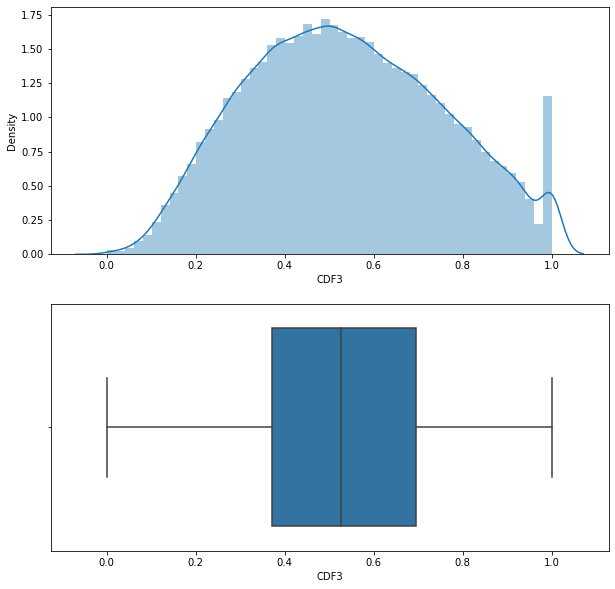

mean = 0.5366332945971416
median = 0.5251375436782837
min = 0.0009884894825518133
max = 1.0


In [151]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["CDF3"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["CDF3"])
plt.show()
print("mean = {}".format(train_df["CDF3"].mean()))
print("median = {}".format(train_df["CDF3"].median()))
print("min = {}".format(train_df["CDF3"].min()))
print("max = {}".format(train_df["CDF3"].max()))

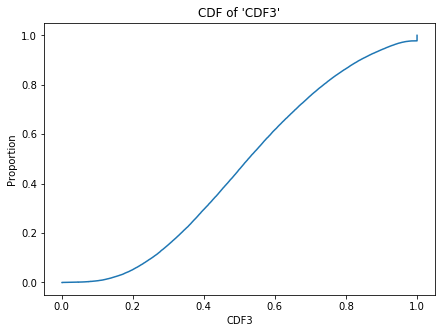

In [101]:
plt.figure(figsize = (7,5))
sns.ecdfplot(data = train_df, x="CDF3")
plt.title("CDF of 'CDF3'")
plt.show()

class 0 CDF3 mean = 0.4838520453414679
class 1 CDF3 mean = 0.5694097487289163
class 0 CDF3 median = 0.4635078310966492
class 1 CDF3 mean = 0.5627373158931732


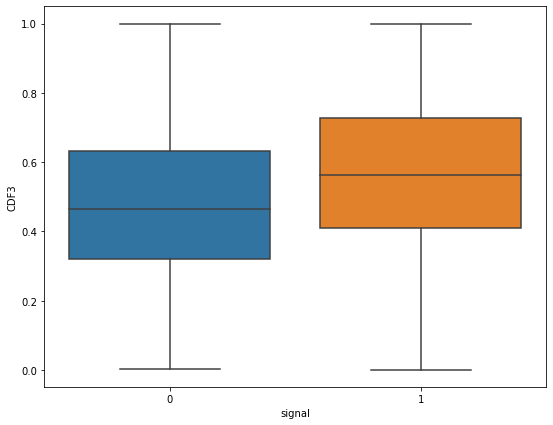

In [152]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "CDF3")
print("class 0 CDF3 mean = {}".format(train_df.groupby("signal").mean()["CDF3"][0]))
print("class 1 CDF3 mean = {}".format(train_df.groupby("signal").mean()["CDF3"][1]))
print("class 0 CDF3 median = {}".format(train_df.groupby("signal").median()["CDF3"][0]))
print("class 1 CDF3 mean = {}".format(train_df.groupby("signal").median()["CDF3"][1]))

"CDF3" can be taken as continuous variable. The distribution of this variable is not well defined and CDF of this variable represents that most of the values are below 1 which also happens to be the maximum value taken by this variable. The IQR for this variable is between 0.4 to 0.7 and there is no significant count of outliers. The boxplots of this variable for two separate signals also shows significant overlap. Therefore this variable might not be as useful in discriminating between the signal 1 and signal 0 as the above discussed variables.

isolatione            -0.328382
p1_IsoBDT             -0.332852
p0_IsoBDT  

#  p0_IsoBDT
p0_IsoBDT - Track isolation variable

In [153]:
train_df["p0_IsoBDT"].nunique()

5357

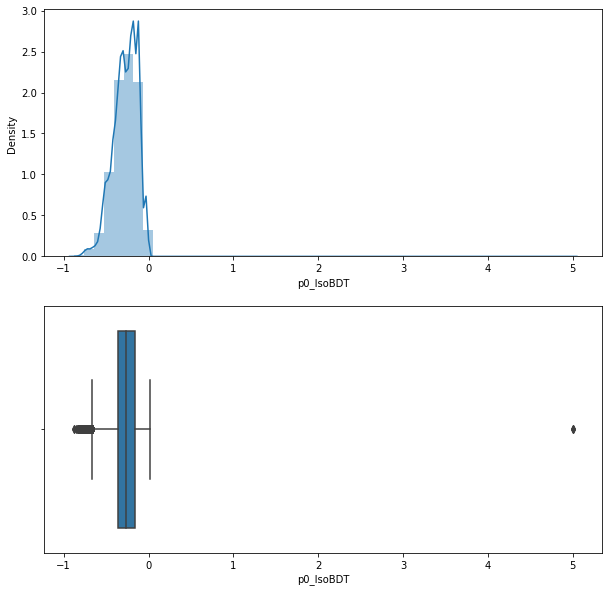

mean = -0.27354312510617024
median = -0.2605596780776977
min = -0.8837201595306396
max = 5.0


In [155]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["p0_IsoBDT"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["p0_IsoBDT"])
plt.show()
print("mean = {}".format(train_df["p0_IsoBDT"].mean()))
print("median = {}".format(train_df["p0_IsoBDT"].median()))
print("min = {}".format(train_df["p0_IsoBDT"].min()))
print("max = {}".format(train_df["p0_IsoBDT"].max()))

class 0 p0_IsoBDT mean = -0.20948368876563128
class 1 p0_IsoBDT mean = -0.31332318348925814
class 0 p0_IsoBDT median = -0.18636959791183472
class 1 p0_IsoBDT mean = -0.3071256577968597


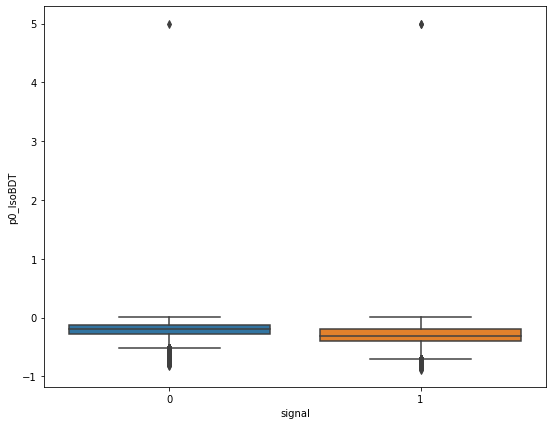

In [160]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "p0_IsoBDT")
print("class 0 p0_IsoBDT mean = {}".format(train_df.groupby("signal").mean()["p0_IsoBDT"][0]))
print("class 1 p0_IsoBDT mean = {}".format(train_df.groupby("signal").mean()["p0_IsoBDT"][1]))
print("class 0 p0_IsoBDT median = {}".format(train_df.groupby("signal").median()["p0_IsoBDT"][0]))
print("class 1 p0_IsoBDT mean = {}".format(train_df.groupby("signal").median()["p0_IsoBDT"][1]))

"p0_IsoBDT" can be taken as a continuous variable with range of -0.88 to 5 even though there are very few data points whose value aproaches 5 so most likely this is an outlier. The PDF of this variable is not destinctly defined even though it is possible to convert it into a normal distribution by some transformation. Even though the value 5 lies too far away from most of the data values, mean and meadian are close together that means there are very few outliers in the data. The separate boxplots for the two signals overlap to a great extent so this might not prove to be as good a candidate to differentiate between two signals as the ones discussed above.

# p1_IsoBDT
p1_IsoBDT - Track isolation variable

In [157]:
train_df["p1_IsoBDT"].nunique()

4673

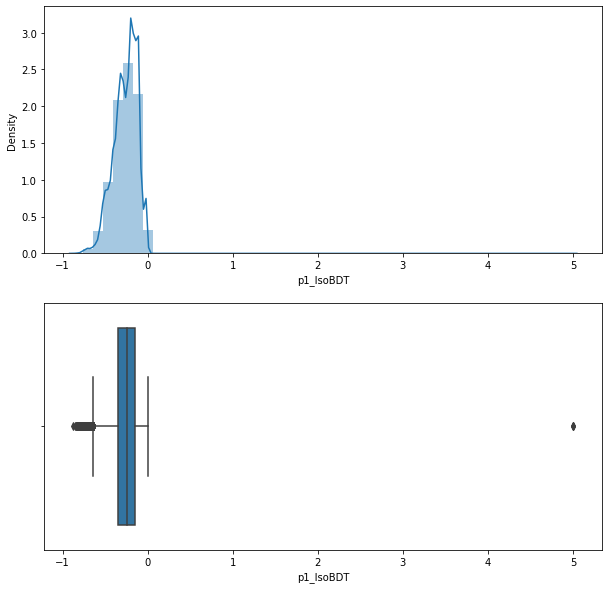

mean = -0.26160421898550584
median = -0.2407205253839493
min = -0.8738177418708801
max = 5.0


In [158]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
sns.distplot(train_df["p1_IsoBDT"])
ax2 = plt.subplot(2,1,2,sharex = ax1)
sns.boxplot(train_df["p1_IsoBDT"])
plt.show()
print("mean = {}".format(train_df["p1_IsoBDT"].mean()))
print("median = {}".format(train_df["p1_IsoBDT"].median()))
print("min = {}".format(train_df["p1_IsoBDT"].min()))
print("max = {}".format(train_df["p1_IsoBDT"].max()))

class 0 p1_IsoBDT mean = -0.20156300305515004
class 1 p1_IsoBDT mean = -0.29888901591072725
class 0 p1_IsoBDT median = -0.1834881603717804
class 1 p1_IsoBDT mean = -0.29401078820228577


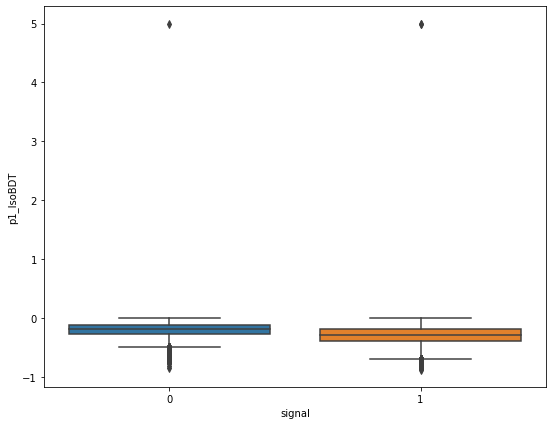

In [162]:
plt.figure(figsize = (9,7))
sns.boxplot(data = train_df, x = "signal", y = "p1_IsoBDT")
print("class 0 p1_IsoBDT mean = {}".format(train_df.groupby("signal").mean()["p1_IsoBDT"][0]))
print("class 1 p1_IsoBDT mean = {}".format(train_df.groupby("signal").mean()["p1_IsoBDT"][1]))
print("class 0 p1_IsoBDT median = {}".format(train_df.groupby("signal").median()["p1_IsoBDT"][0]))
print("class 1 p1_IsoBDT mean = {}".format(train_df.groupby("signal").median()["p1_IsoBDT"][1]))

**"p1_IsoBDT" behave very similar to "p0_IsoBDT". So now we will check for dependence of "p1_IsoBDT" and "p0_IsoBDT" on each other**

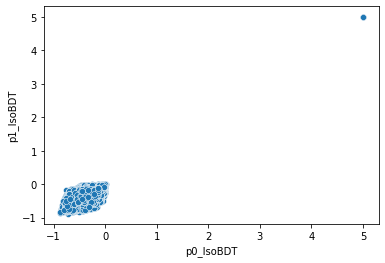

In [102]:
sns.scatterplot(data = train_df, x = "p0_IsoBDT", y = "p1_IsoBDT")
plt.show()

In [164]:
train_df["p0_IsoBDT"].corr(train_df["p1_IsoBDT"])

0.7381401495030835

In [165]:
train_df["p0_IsoBDT"].corr(train_df["signal"])

-0.3449298535004495

In [166]:
train_df["p1_IsoBDT"].corr(train_df["signal"])

-0.3328515862211273

**"p1_IsoBDT" and "p0_IsoBDT" are highly corrrelated to each other but "p0_IsoBDT" is more correlated to the target variable "signal" so take "p0_IsoBDT" and drop "p1_IsoBDT"**

# isolatione
isolatione - Track isolation variable

In [168]:
train_df["isolatione"].nunique()

10

In [169]:
train_df["isolatione"].unique()

array([0., 1., 3., 2., 4., 9., 5., 6., 7., 8.])

**"isolatione" is a discrete variable with 10 distinct values ranging from 0.0 to 9.0**

## Chi-square test for dependance of "signal" on "isolatione"

In [170]:
# contigency table between "signal" and "isolatione"
sig_isoe_cont = pd.crosstab(train_df['signal'],train_df['isolatione'], margins = False)
print("null hypothesis : no relation exists between 'signal' and 'isolatione i.e. they are independant'")
print("alternate hypothesis : there is a relationship between 'signal' and 'isolatione' i.e. they are dependant")
print("\n")
stat, p, dof, expected = chi2_contingency(sig_isoe_cont)
print('dof = {}'.format(dof))
print("expected contigency table:")
print(expected)
print("-"*100)
print("observed contingency table:")
print(sig_isoe_cont.values)
print("-"*100)
print("\n")
# interpret test-statistic
print("Interpreting test statistic: \n")
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability = {}, critical = {}, stat = {}'.format(prob, critical, stat))
if abs(stat) >= critical:
    print('reject null hypothesis. variables are dependent')
else:
    print('accept null hypothesis. the variables are independent')
    
print("-"*100)
print("\n")
# interpret p-value
print("Interpreting p-value: \n")
alpha = 1.0 - prob
print('significance = {}, p = {}'.format(alpha, p))
if p <= alpha:
    print('reject null hypothesis. the variables are dependent')
else:
    print('accept null hypothesis. the variables are independent')

null hypothesis : no relation exists between 'signal' and 'isolatione i.e. they are independant'
alternate hypothesis : there is a relationship between 'signal' and 'isolatione' i.e. they are dependant


dof = 9
expected contigency table:
[[1.98399410e+04 4.33276820e+03 1.23585413e+03 3.44016432e+02
  9.30913061e+01 2.14531405e+01 8.04492769e+00 1.91545897e+00
  7.66183589e-01 1.14927538e+00]
 [3.19490590e+04 6.97723180e+03 1.99014587e+03 5.53983568e+02
  1.49908694e+02 3.45468595e+01 1.29550723e+01 3.08454103e+00
  1.23381641e+00 1.85072462e+00]]
----------------------------------------------------------------------------------------------------
observed contingency table:
[[15089  7241  2507   750   211    52    20     5     1     3]
 [36700  4069   719   148    32     4     1     0     1     0]]
----------------------------------------------------------------------------------------------------


Interpreting test statistic: 

probability = 0.95, critical = 16.918977604620448, stat 

### 'signal' is depedent on 'isolatione'

# Multicollinearity

## We have already checked for correlation between independent variables with correlation matrix and have made some high level observations. Now let us check for multicollinearity from variable inflation factor(VIF) 

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(df):
    vif_df = pd.DataFrame()
    vif_df["variables"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

In [175]:
vif_df = vif(train_df.iloc[:,:-1])

In [176]:
vif_df

,variables,VIF
0,id,4.016656
1,LifeTime,59.357918
2,dira,303.391293
3,FlightDistance,11.490605
4,FlightDistanceError,11.984012
5,IP,17.789400
6,IPSig,16.423111
7,VertexChi2,4.307587
8,pt,1566.449327
9,DOCAone,2.361848


**VIF = 1 represents no correlation between the given independent variable and the other independent variables in the dataset. If VIF is greater than 5 or 10 then it indicates high multicollinearity between the given independent variable and the other independent variables. So let us get variables having VIF greater than 10**

In [177]:
high_vif = vif_df[vif_df["VIF"] > 10]

In [178]:
high_vif

,variables,VIF
1,LifeTime,59.357918
2,dira,303.391293
3,FlightDistance,11.490605
4,FlightDistanceError,11.984012
5,IP,17.789400
6,IPSig,16.423111
8,pt,1566.449327
17,isolationd,inf
18,isolatione,inf
19,isolationf,inf


**But through basic feature importance and analysis of these features we have identified following features as imprtant : “LifeTime”, “dira”, “IP”, “IPSig”, “VertexChi2”, “iso”, “ISO_SumBDT”, “p0_track_Chi2Dof”, “p0_IpSig”, “SPDhits”, “CDF2”, “CDF3”, “p0_IsoBDT”, “isolation”. So we will be NOT dropping these features. So let us remove these features from the list of features with high VIF.**

In [181]:
high_vif_cols = list(high_vif["variables"])

In [182]:
high_vif_cols

['LifeTime',
 'dira',
 'FlightDistance',
 'FlightDistanceError',
 'IP',
 'IPSig',
 'pt',
 'isolationd',
 'isolatione',
 'isolationf',
 'iso',
 'CDF1',
 'CDF2',
 'CDF3',
 'ISO_SumBDT',
 'p0_IsoBDT',
 'p1_IsoBDT',
 'p2_IsoBDT',
 'p0_track_Chi2Dof',
 'p1_track_Chi2Dof',
 'p2_track_Chi2Dof',
 'p0_IP',
 'p1_IP',
 'p2_IP',
 'p1_IPSig',
 'p0_pt',
 'p1_pt',
 'p2_pt',
 'p0_p',
 'p1_p',
 'p2_p',
 'p0_eta',
 'p1_eta',
 'p2_eta']

In [185]:
high_vif_cols = list(set(high_vif_cols) - set(["LifeTime", "dira", "IP", "IPSig", "VertexChi2", "iso", "ISO_SumBDT", "p0_track_Chi2Dof", "p0_IpSig", "SPDhits", "CDF2", "CDF3", "p0_IsoBDT", "isolation"]))

In [186]:
high_vif_cols

['CDF1',
 'p2_IP',
 'p0_p',
 'p1_IPSig',
 'p1_IP',
 'p2_eta',
 'p0_IP',
 'p1_pt',
 'p0_pt',
 'isolationf',
 'p1_track_Chi2Dof',
 'p2_pt',
 'isolationd',
 'p2_track_Chi2Dof',
 'FlightDistance',
 'p1_eta',
 'pt',
 'p2_p',
 'p2_IsoBDT',
 'FlightDistanceError',
 'isolatione',
 'p1_p',
 'p1_IsoBDT',
 'p0_eta']

So we will most probably remove above columns due to their high multicollinearity and less feature importance. Let us train another randomforestclassifier by removing redundant features with same parameters as used while checking the feature importance and check the accuracy on training data.

In [189]:
lst1  = list(set(list(train_df.columns)) - set(high_vif_cols))

In [190]:
x = train_df[lst1]
y = train_df['signal']

In [192]:
# training model with best hyperparameters
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(n_estimators = 200,min_samples_split = 5, min_samples_leaf = 2,max_features = 'auto', max_depth = 80, bootstrap = True)
model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
predictions = model.predict(x)

In [195]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, predictions))

1.0


In [196]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predictions))

[[25879     0]
 [    0 41674]]


**It can be seen that there is improvement after removing redundant features.**

In [2]:
import time
time.time()

1632293701.7369182